<a href="https://colab.research.google.com/github/ZhangYizhe/PythonForDataAnalysis/blob/main/HK_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

cnfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/FangZhengHeiTiJianTi.ttf')

In [98]:
chineseCalendar = pd.read_csv('/content/二十四节气.csv')
# chineseCalendar['Date'] = chineseCalendar['Date'].astype('string')

chineseCalendar['month'] = chineseCalendar['Date'].str.replace('月', '/').str.replace('日', '').str.split('/',expand=True)[0]
chineseCalendar['day'] = chineseCalendar['Date'].str.replace('月', '/').str.replace('日', '').str.split('/',expand=True)[1]
chineseCalendar = chineseCalendar.drop(columns=['Date'])

chineseCalendar

,Name,month,day
0,立春,2,4
1,雨水,2,19
2,驚蟄,3,6
3,春分,3,21
4,清明,4,5
5,穀雨,4,20
6,立夏,5,6
7,小滿,5,21
8,芒種,6,6
9,夏至,6,21


In [5]:
def getData(url):
  df = pd.read_csv(url)
  df['年/Year'] = df['年/Year'].astype('string')
  df['月/Month'] = df['月/Month'].astype('string')
  df['日/Day'] = df['日/Day'].astype('string')
  # df['date'] = df['日/Day'] + '/' + df['月/Month'] + '/' + df['年/Year']
  # df['date'] = df['date'].astype('object')
  # df = df.drop(columns=['年/Year', '月/Month', '日/Day', '數據完整性/data Completeness'])
  # df.set_index('date', inplace=True)

  df = df.drop(columns=['數據完整性/data Completeness'])
  df = df.rename(columns={'年/Year':'year', '月/Month':'month', '日/Day':'day', '數值/Value':'temperature'})
  df['temperature'] = df['temperature'].replace('***', np.nan)
  df['temperature'] = df['temperature'].astype('float')
  df.set_index('year', inplace=True)
  return df

In [6]:
averageTemperatureDF = getData('/content/CLMTEMP_HKO_.csv')['1980':'2020']
lowTemperatureDF = getData('/content/日最低氣溫(攝氏度).csv')['1980':'2020']
highTemperatureDF = getData('/content/日最高氣溫(攝氏度) .csv')['1980':'2020']

In [7]:
totalDF = averageTemperatureDF
totalDF = totalDF.rename(columns={'temperature' : 'average'})
totalDF['low'] = lowTemperatureDF['temperature']
totalDF['high'] = highTemperatureDF['temperature']

In [103]:
def dataProcess(df):
  frame = pd.DataFrame()
  for ccrow in chineseCalendar.iterrows():
    month = ccrow[1]['month']
    day = ccrow[1]['day']

    row = df.loc[(df['month'] == month) & (df['day'] == day)].copy()
    row.reset_index(drop=True, inplace=True)
    row['date'] = row['day'] + '/' + row['month']
    row = row.drop(columns=['day', 'month', 'low', 'high'])
    frame = frame.append(row)
  frame.set_index('date', inplace=True)

  return frame

datas = {}
yearRange = range(1980, 2021)
for i in yearRange:
  year = '{year}'.format(year=i)
  processData = dataProcess(totalDF[year:year])
  for item in processData.iterrows():
    date = item[0]
    if date not in datas:
      datas[date] = []
    datas[date].append(item[1]['average'])

datas = pd.DataFrame(datas).T

tempIndex = 0
years = {}
for i in yearRange:
  years[tempIndex] = i
  tempIndex += 1

datas = datas.rename(columns=years)
average = datas.loc['7/11'].mean()
high = datas.loc['7/11'].max()
min = datas.loc['7/11'].min()

specialDates = datas.loc['7/11']

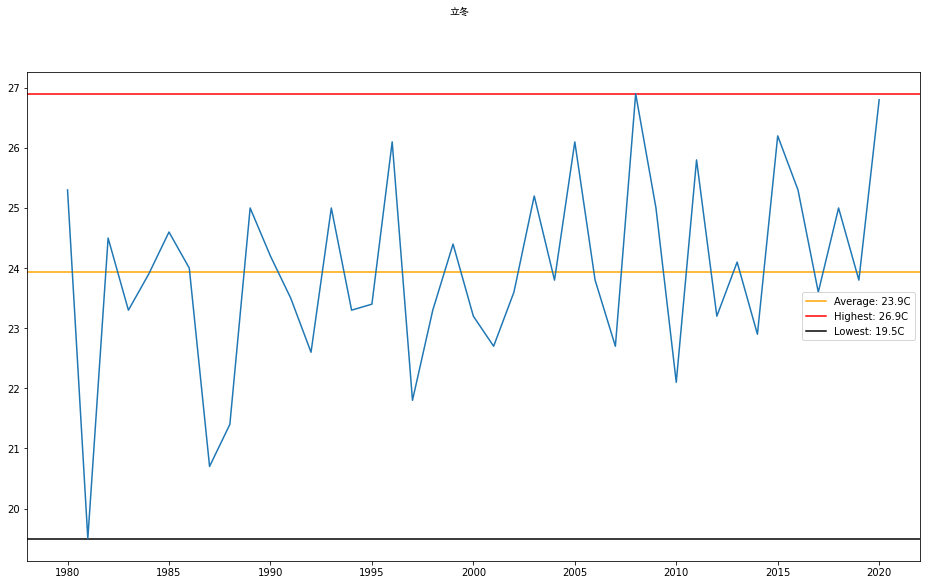

In [104]:
fig = plt.figure(figsize=(16,9))
plt.axhline(y=average, color='orange', label='Average: {temperature:.1f}C'.format(temperature=average))
plt.axhline(y=high, color='red', label='Highest: {temperature:.1f}C'.format(temperature=high))
plt.axhline(y=min, color='black', label='Lowest: {temperature:.1f}C'.format(temperature=min))
plt.plot(specialDates.index, specialDates.values)
fig.suptitle('立冬', fontproperties=cnfont)
plt.legend()